### RAG 연동 LangGraph

In [1]:
import os
from dotenv import load_dotenv

# .env 파일의 내용 불러오기
load_dotenv("C:/env/.env")

True

In [2]:
from glob import glob 

for g in glob('*.pdf'):
    print(g)

유튜브 기반 사용자 콘텐츠에서의 리뷰 이상 탐지.pdf


In [3]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter

def read_pdf_and_split_text(pdf_path, chunk_size=1000, chunk_overlap=100):
    """
    주어진 PDF 파일을 읽고 텍스트를 분할합니다.
    매개변수:
        pdf_path (str): PDF 파일의 경로.
        chunk_size (int, 선택적): 각 텍스트 청크의 크기. 기본값은 1000입니다.
        chunk_overlap (int, 선택적): 청크 간의 중첩 크기. 기본값은 100입니다.
    반환값:
        list: 분할된 텍스트 청크의 리스트.
    """
    print(f"PDF: {pdf_path} -----------------------------")

    pdf_loader = PyPDFLoader(pdf_path)
    data_from_pdf = pdf_loader.load()

    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size, chunk_overlap=chunk_overlap
    )

    splits = text_splitter.split_documents(data_from_pdf)
    
    print(f"Number of splits: {len(splits)}\n")
    return splits


In [4]:
from langchain_openai import OpenAIEmbeddings
from langchain_chroma import Chroma
import os

##### Vectorstore 설정 #####
embedding = OpenAIEmbeddings(model='text-embedding-3-small')

persist_directory='chroma_store'

if os.path.exists(persist_directory):
    print("Loading existing Chroma store")
    vectorstore = Chroma(
        persist_directory=persist_directory, 
        embedding_function=embedding
    )
else:
    print("Creating new Chroma store")
    
    vectorstore = None
    for g in glob('*.pdf'):
        chunks = read_pdf_and_split_text(g)
        # 100개씩 나눠서 저장
        for i in range(0, len(chunks), 100):
            if vectorstore is None:
                vectorstore = Chroma.from_documents(
                    documents=chunks[i:i+100],
                    embedding=embedding,
                    persist_directory=persist_directory
                )
            else:
                vectorstore.add_documents(
                    documents=chunks[i:i+100]
                )


Loading existing Chroma store


In [5]:
retriever = vectorstore.as_retriever(search_kwargs={"k": 2})

chunks = retriever.invoke("유튜브 기반 사용자 콘텐츠")

for chunk in chunks:
    print(chunk.metadata)
    print(chunk.page_content)


{'creationdate': '2025-10-07T19:23:49+09:00', 'total_pages': 16, 'source': '유튜브 기반 사용자 콘텐츠에서의 리뷰 이상 탐지.pdf', 'page_label': '3', 'producer': 'iText 2.1.7 by 1T3XT', 'page': 2, 'moddate': '2025-10-07T19:26:28+09:00', 'creator': 'PyPDF'}
유튜브 기반 사용자 콘텐츠에서의 리뷰 이상 탐지   49
구자들은 가짜 정보가 소비자 의사 결정에 미치
는 영향을 줄이기 위해 조작된 리뷰 탐지를 개
선하기 위한 머신러닝 기술을 통합하는 방법을 
탐구한다. 여러 조작된 리뷰 인식 방법이 제안
되었지만, 현재 연구는 여전히 여러 가지 도전 
과제에 직면해 있다. 예를 들어, 다중 플랫폼 및 
다중 모달 콘텐츠 인식의 제한된 효과와 극단적
인 감정 인식의 정확성 부족 등이 있다. 따라서 
본 논문에서는 유튜브 플랫폼에서 호텔 리뷰를 
연구하여 가짜 및 극단적인 리뷰를 인식하는 문
제에 초점을 맞추기로 한다. 전통적인 텍스트 
플랫폼과 비교할 때, 소셜 비디오 플랫폼에서의 
리뷰는 더 다양하고 더 많은 노이즈를 포함하고 
있어 인식 난이도가 높아지며, 이 문제를 해결
하기 위해서는 더 정교한 모델링 방법이 절실히 
필요하다. 본 연구는 머신러닝과 자연어 처리 
기술을 결합하여 리뷰의 텍스트 특징과 감정 경
향을 분석하여 잠재적으로 허위 또는 조작 가능
한 리뷰를 식별하는 효율적이고 해석 가능한 탐
지 프레임워크를 구축하는 것을 목표로 한다. 
그에 따라 본 연구는 YouTube라는 특정 영상 기
반 플랫폼에서 수집된 사용자 댓글 데이터를 중
심으로 감정 이상성과 허위성 패턴을 분석하였
으며, 이는 비디오 소셜 플랫폼에서 리뷰 인식 
분야의 현재 격차를 메울 뿐만 아니라 플랫폼 
콘텐츠의 신뢰성을 높이고 사용자 결정의 품질
을 향상시키는 데 도움이 될 수 있다.
조작된 리뷰와 극단적인 리뷰가 점점 더 흔

In [6]:
from langchain_openai import ChatOpenAI

# 모델 초기화
model = ChatOpenAI(model="gpt-4o-mini")
model.invoke('안녕하세요!')

AIMessage(content='안녕하세요! 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 10, 'total_tokens': 20, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CVAkyaY5TeKzJ9Zu7MI5Np6rS4EpF', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--18f63d9b-aac3-4d83-b9b2-65043b9b5327-0', usage_metadata={'input_tokens': 10, 'output_tokens': 10, 'total_tokens': 20, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [7]:
# Router 설정
from langchain_core.prompts import ChatPromptTemplate
from typing import Literal # 문자열 리터럴 타입을 지원하는 typing 모듈의 클래스
from pydantic import BaseModel, Field

# Data model
class RouteQuery(BaseModel):
    """사용자 쿼리를 가장 관련성이 높은 데이터 소스로 라우팅합니다."""
    
    datasource: Literal["vectorstore", "casual_talk"] = Field(
        ...,
        description="""
        사용자 질문에 따라 casual_talk 또는 vectorstore로 라우팅합니다.
        - casual_talk: 일상 대화를 위한 데이터 소스. 사용자가 일상적인 질문을 할 때 사용합니다.
        - vectorstore: 사용자 질문에 답하기 위해 RAG로 vectorstore 검색이 필요한 경우 사용합니다.
        """,
    )

In [8]:
# 특정 모델을 structured output (구조화된 출력)과 함께 사용하기 위해 설정
structured_llm_router = model.with_structured_output(RouteQuery)

router_system = """
당신은 사용자의 질문을 vectorstore 또는 casual_talk으로 라우팅하는 전문가입니다.
- vectorstore에는 유튜브 기반 사용자 콘텐츠에서의 리뷰 이상 탐지 결과와 관련된 문서가 포함되어 있습니다. 이 주제에 대한 질문에는 vectorstore를 사용하십시오.
- 사용자의 질문이 일상 대화에 관련된 경우 casual_talk을 사용하십시오.
"""

# 시스템 메시지와 사용자의 질문을 포함하는 프롬프트 템플릿 생성
route_prompt = ChatPromptTemplate.from_messages([
    ("system", router_system),
    ("human", "{question}"),
])

# 라우터 프롬프트와 구조화된 출력 모델을 결합한 객체
question_router = route_prompt | structured_llm_router


In [9]:
print(
    question_router.invoke({
        "question": "유튜브 기반 사용자 콘텐츠에서의 리뷰 이상 탐지 결과는?"
    })
)

print(question_router.invoke({"question": "잘 지냈어?"}))

datasource='vectorstore'
datasource='casual_talk'


In [10]:
from langchain_core.prompts import PromptTemplate

class GradeDocuments(BaseModel):
    """검색된 문서가 질문과 관련성 있는지 yes 또는 no로 평가합니다."""

    binary_score: Literal["yes", "no"] = Field(
        description="문서가 질문과 관련이 있는지 여부를 'yes' 또는 'no'로 평가합니다."
    )

structured_llm_grader = model.with_structured_output(GradeDocuments)

In [11]:
grader_prompt = PromptTemplate.from_template("""
당신은 검색된 문서가 사용자 질문과 관련이 있는지 평가하는 평가자입니다. \n 
문서에 사용자 질문과 관련된 키워드 또는 의미가 포함되어 있으면, 해당 문서를 관련성이 있다고 평가하십시오. \n
엄격한 테스트가 필요하지 않습니다. 목표는 잘못된 검색 결과를 걸러내는 것입니다. \n
문서가 질문과 관련이 있는지 여부를 나타내기 위해 'yes' 또는 'no'로 이진 점수를 부여하십시오.
                                             
Retrieved document: \n {document} \n\n 
User question: {question}
""")

retrieval_grader = grader_prompt | structured_llm_grader
question = "유튜브 기반 사용자 콘텐츠에서의 리뷰 이상 탐지 결과"
documents = retriever.invoke(question)

for doc in documents:
    print(doc)


page_content='유튜브 기반 사용자 콘텐츠에서의 리뷰 이상 탐지   49
구자들은 가짜 정보가 소비자 의사 결정에 미치
는 영향을 줄이기 위해 조작된 리뷰 탐지를 개
선하기 위한 머신러닝 기술을 통합하는 방법을 
탐구한다. 여러 조작된 리뷰 인식 방법이 제안
되었지만, 현재 연구는 여전히 여러 가지 도전 
과제에 직면해 있다. 예를 들어, 다중 플랫폼 및 
다중 모달 콘텐츠 인식의 제한된 효과와 극단적
인 감정 인식의 정확성 부족 등이 있다. 따라서 
본 논문에서는 유튜브 플랫폼에서 호텔 리뷰를 
연구하여 가짜 및 극단적인 리뷰를 인식하는 문
제에 초점을 맞추기로 한다. 전통적인 텍스트 
플랫폼과 비교할 때, 소셜 비디오 플랫폼에서의 
리뷰는 더 다양하고 더 많은 노이즈를 포함하고 
있어 인식 난이도가 높아지며, 이 문제를 해결
하기 위해서는 더 정교한 모델링 방법이 절실히 
필요하다. 본 연구는 머신러닝과 자연어 처리 
기술을 결합하여 리뷰의 텍스트 특징과 감정 경
향을 분석하여 잠재적으로 허위 또는 조작 가능
한 리뷰를 식별하는 효율적이고 해석 가능한 탐
지 프레임워크를 구축하는 것을 목표로 한다. 
그에 따라 본 연구는 YouTube라는 특정 영상 기
반 플랫폼에서 수집된 사용자 댓글 데이터를 중
심으로 감정 이상성과 허위성 패턴을 분석하였
으며, 이는 비디오 소셜 플랫폼에서 리뷰 인식 
분야의 현재 격차를 메울 뿐만 아니라 플랫폼 
콘텐츠의 신뢰성을 높이고 사용자 결정의 품질
을 향상시키는 데 도움이 될 수 있다.
조작된 리뷰와 극단적인 리뷰가 점점 더 흔해
지고 있으며, 본 연구는 이를 발견할 수 있는 방
법을 제안한다. 본 연구는 감성 분석, 기계 학습, 
주제 모델링이라는 세 가지 방법을 결합하여 사
용자가 생성한 리뷰에서 기만적이거나 조작적
인 내용을 식별한다.
본 연구는 다음과 같이 구성되어 있다: 2장에
서는 조작된 리뷰 탐지 및 극단적인 리뷰 탐지
에 대한 기존 연구에 대해 설명한다. 3장에서는 
연구방법을 설명하며, 4장에서는 연

In [12]:
filtered_docs = []

for i, doc in enumerate(documents):
    print(f"Document {i + 1}:")
    is_relevant = retrieval_grader.invoke({"question": question, "document": doc.page_content})
    print(is_relevant)
    print(doc.page_content[:200])
    print("=================================\n\n")

    if is_relevant.binary_score == "yes":
        filtered_docs.append(doc)

print(f"Filtered documents: {len(filtered_docs)}")


Document 1:
binary_score='yes'
유튜브 기반 사용자 콘텐츠에서의 리뷰 이상 탐지   49
구자들은 가짜 정보가 소비자 의사 결정에 미치
는 영향을 줄이기 위해 조작된 리뷰 탐지를 개
선하기 위한 머신러닝 기술을 통합하는 방법을 
탐구한다. 여러 조작된 리뷰 인식 방법이 제안
되었지만, 현재 연구는 여전히 여러 가지 도전 
과제에 직면해 있다. 예를 들어, 다중 플랫폼 및 
다중 모달 콘텐


Document 2:
binary_score='yes'
유튜브 기반 사용자 콘텐츠에서의 리뷰 이상 탐지   59
분석의 정밀도를 높이는 실증적 방법론으로 활
용 가능하다. 또한 토픽 모델링과 감정 분포를 
결합한 분석 방식은 비정형 리뷰 데이터에서 감
정-주제 연관 구조를 밝히는 데 있어 새로운 접
근을 제시하였다.
본 연구의 실무적 시사점은 다음과 같다. 실
무적으로는 본 연구의 결과가 호텔 예약 플랫폼, 



Filtered documents: 2


In [13]:
### Generate
# PromptTemplate을 사용하여 RAG를 위한 프롬프트를 생성합니다.

rag_generate_system = """
너는 사용자의 질문에 대해 주어진 context에 기반하여 답변하는 도시 계획 전문가이다. 
주어진 context는 vectorstore에서 검색된 결과이다. 
주어진 context를 기반으로 사용자의 question에 대해 답변하라.

=================================
question: {question}
context: {context}
"""

# PromptTemplate을 생성하여 question과 context를 포맷팅
rag_prompt = PromptTemplate(
    input_variables=["question", "context"],
    template=rag_generate_system
)

# rag chain
rag_chain = rag_prompt | model 

# 사용자 질문과 검색된 문서를 입력으로 사용하여 RAG를 실행
question = "유튜브 기반 사용자 콘텐츠에서의 리뷰 이상 탐지 결과"

rag_chain.invoke({"question": question, "context": filtered_docs})


AIMessage(content='유튜브 기반 사용자 콘텐츠에서의 리뷰 이상 탐지에 관한 연구는 가짜 정보가 소비자 의사 결정에 미치는 영향을 줄이기 위해 조작된 리뷰 탐지에 머신러닝 기술을 활용하는 방법을 탐구하고 있습니다. 연구에서는 유튜브 플랫폼에서의 호텔 리뷰를 중심으로 가짜 및 극단적인 리뷰를 인식하는 문제를 다루고 있으며, 이는 전통적인 텍스트 플랫폼과 비교해 더 다양하고 많은 노이즈를 포함하고 있어 인식 난이도가 높다는 점을 강조합니다.\n\n연구는 감성 분석, 기계 학습, 토픽 모델링을 결합하여 사용자가 생성한 리뷰에서 기만적이거나 조작적인 내용을 식별하는 효율적이고 해석 가능한 탐지 프레임워크를 구축하는 것을 목표로 하고 있습니다. 이러한 방식은 리뷰의 텍스트 특징과 감정 경향을 분석하여 허위 또는 조작 가능성이 있는 리뷰를 식별하는 데 도움이 됩니다.\n\n결과적으로, 연구는 다양한 분야에서 조작된 리뷰 및 극단적 콘텐츠를 자동으로 탐지하고 모니터링하는 시스템 개발에 활용될 수 있으며, 감정 점수 기반 필터링과 토픽 기반 클러스터링을 통해 플랫폼의 신뢰성을 높이고 소비자에게 더 정확한 정보를 제공하는 데 기여할 수 있습니다.\n\n향후 연구에서는 SVM 외에 딥러닝 기반 모델의 적용, 다양한 플랫폼에서의 리뷰 데이터 통합 분석, 리뷰어 프로필 및 행동적 메타데이터를 포함한 다변량 분석 등을 통해 조작 탐지의 정밀도를 더욱 향상시킬 필요가 있다고 언급되고 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 359, 'prompt_tokens': 1505, 'total_tokens': 1864, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_t

In [14]:
from typing import List
from typing_extensions import TypedDict

class GraphState(TypedDict):
    question: str   # 사용자 질문
    generation: str # LLM 생성 결과
    documents: List[str] # 검색된 문서


In [15]:
def route_question(state): 
    """
    사용자 질문을 vectorstore 또는 casual_talk로 라우팅합니다.
    
    Args:
        state (dict): 현재 graph state

    return:
        state (dict): 라우팅된 데이터 소스와 사용자 질문을 포함하는 새로운 graph state
    """
    print('------ROUTE------')
    question = state['question']
    route = question_router.invoke({"question": question})

    
    print(f"---Routing to {route.datasource}---")
    return route.datasource   

In [16]:
def retrieve(state): 
    """
    vectorstore에서 질문에 대한 문서를 검색합니다.
    
    Args:
        state (dict): 현재 graph state

    return:
        state (dict): 검색된 문서와 사용자 질문을 포함하는 새로운 graph state
    """
    print('------RETRIEVE------')
    question = state['question']

    # Retrieve documents
    documents = retriever.invoke(question)
    return {"documents": documents, "question": question}

In [17]:
def grade_documents(state):
    """
    검색된 문서를 평가하여 질문과 관련성이 있는지 확인합니다.

    Args:
        state (dict): 현재 graph state

    return:
        state (dict): 관련성이 있는 문서와 사용자 질문을 포함하는 새로운 graph state
    """
    print('------GRADE------')
    question = state['question']
    documents = state['documents']
    filtered_docs = []

    for i, doc in enumerate(documents):
        is_relevant = retrieval_grader.invoke({"question": question, "document": doc.page_content})
        if is_relevant.binary_score == "yes":
            filtered_docs.append(doc)
    return {"documents": filtered_docs, "question": question}  

In [18]:
def generate(state):
    """
    LLM을 사용하여 문서와 사용자 질문에 대한 답변을 생성합니다.

    Args:
        state (dict): 현재 graph state

    return:
        state (dict): LLM 생성 결과와 사용자 질문을 포함하는 새로운 graph state
    """
    print('------GENERATE------')
    question = state['question']
    documents = state['documents']
    generation = rag_chain.invoke({"question": question, "context": documents})
    return {
        "documents": documents,
        "question": question,
        "generation": generation
    }

In [19]:
def casual_talk(state):
    """
    일상 대화를 위한 답변을 생성합니다.

    Args:
        state (dict): 현재 graph state

    return:
        state (dict): 일상 대화 결과와 사용자 질문을 포함하는 새로운 graph state
    """
    print('------CASUAL TALK------')
    question = state['question']
    generation = model.invoke(question)
    return {
        "question": question,
        "generation": generation
    }

In [20]:
from langgraph.graph import START, StateGraph, END

workflow = StateGraph(GraphState)

In [21]:
# 노드를 정의 
workflow.add_node("retrieve", retrieve)
workflow.add_node("grade_documents", grade_documents)
workflow.add_node("generate", generate)
workflow.add_node("casual_talk", casual_talk)

In [22]:
# graph를 정의
workflow.add_conditional_edges(
    START, 
    route_question,
    {
        "vectorstore": "retrieve",
        "casual_talk": "casual_talk"
    }
)
workflow.add_edge("casual_talk", END)
workflow.add_edge("retrieve", "grade_documents")
workflow.add_edge("grade_documents", "generate")
workflow.add_edge("generate", END)

app = workflow.compile() # workflow를 컴파일

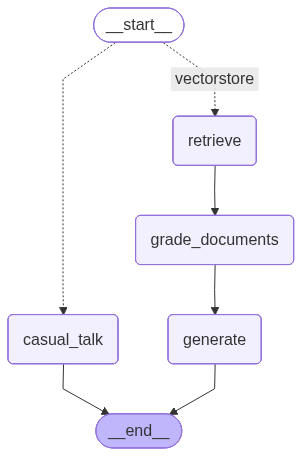

In [23]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    #  실패 시 통과
    pass


In [24]:
inputs = {
    "question": "유튜브 기반 사용자 콘텐츠에서의 리뷰 이상 탐지 결과"
}

app.invoke(inputs) # workflow를 실행합니다.

------ROUTE------
---Routing to vectorstore---
------RETRIEVE------
------GRADE------
------GENERATE------


{'question': '유튜브 기반 사용자 콘텐츠에서의 리뷰 이상 탐지 결과',
 'generation': AIMessage(content='유튜브 기반 사용자 콘텐츠에서의 리뷰 이상 탐지 연구에서는 가짜 정보가 소비자 결정에 미치는 영향을 줄이기 위해 조작된 리뷰 탐지를 위한 머신러닝 기술을 통합하는 방법을 다루고 있습니다. 이를 통해 다중 플랫폼과 다중 모달 콘텐츠 인식의 효과를 개선하고, 극단적인 감정 인식 정확성을 높이기 위한 연구가 필요하다고 강조합니다.\n\n본 연구는 특히 유튜브 플랫폼에서 호텔 리뷰를 중심으로 가짜 및 극단적인 리뷰를 인식하는 문제에 집중하며, 다양한 노이즈가 포함된 소셜 비디오 플랫폼에서의 인식 난이도도 언급됩니다. 연구는 머신러닝과 자연어 처리 기술을 결합하여 리뷰의 텍스트 특징과 감정 경향을 분석하고, 이를 통해 허위 또는 조작 가능한 리뷰를 식별하는 탐지 프레임워크를 구축하고자 합니다.\n\n실무적 시사점으로는 호텔 예약 플랫폼, 리뷰 기반 커머스, 유튜브 여행 콘텐츠 분석 등의 분야에서 조작된 리뷰 및 극단적 콘텐츠를 자동 탐지하고 모니터링하는 시스템 개발에 활용될 수 있다는 점을 들 수 있습니다. 이를 통해 플랫폼의 신뢰성을 높이고 소비자에게 보다 정확한 정보를 제공할 수 있습니다.\n\n향후 연구 방향으로는 딥러닝 기반 모델의 활용, 다양한 플랫폼에서의 데이터 통합 분석, 행동적 메타데이터와의 결합 분석 등이 제안되어 조작 탐지의 정밀도를 높이는 데 기여할 수 있을 것입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 336, 'prompt_tokens': 1505, 'total_tokens': 1841, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 

In [25]:
inputs = {
    "question": "잘 지내고 있어?"
}

app.invoke(inputs) # workflow를 실행합니다.

------ROUTE------
---Routing to casual_talk---
------CASUAL TALK------


{'question': '잘 지내고 있어?',
 'generation': AIMessage(content='네, 잘 지내고 있습니다! 질문이나 도움이 필요한 것이 있으면 말씀해 주세요. 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 13, 'total_tokens': 39, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_51db84afab', 'id': 'chatcmpl-CVAlFrxzcTuL2cOBe0gquHdIZkPBv', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--12e4d8e6-024a-4c36-a10a-c6c9f0876a5b-0', usage_metadata={'input_tokens': 13, 'output_tokens': 26, 'total_tokens': 39, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})}

In [26]:
inputs = {
    "question": "유튜브 기반 사용자 콘텐츠에서의 리뷰 이상 탐지 결과"
}

for msg, meta in app.stream(inputs, stream_mode='messages'):
    print(msg.content, end='')


------ROUTE------
{"datasource":"vectorstore"}---Routing to vectorstore---
------RETRIEVE------
------GRADE------
{"binary_score":"yes"}{"binary_score":"yes"}------GENERATE------
유튜브 기반 사용자 콘텐츠에서의 리뷰 이상 탐지에 관한 연구는 가짜 정보가 소비자 의사 결정에 미치는 영향을 줄이기 위해 다양한 머신러닝 기술을 활용하여 조작된 리뷰를 탐지하는 방안을 모색하고 있습니다. 연구에서는 주로 유튜브 플랫폼에서의 호텔 리뷰를 대상으로 하여, 허위 및 극단적인 리뷰를 식별하기 위한 능력을 개발하고자 하였습니다.

특히, 이 연구는 사용자 댓글 데이터를 분석하여 감정적 이상성과 허위성 패턴을 이해하는 데 중점을 두고 있습니다. 기존 연구들이 해결하지 못한 다양한 도전과제—예를 들어 다중 플랫폼에서의 인식 제한과 극단적 감정 인식의 정확성 부족—를 해결하기 위해, 연구자들은 감정 분석, 기계 학습, 주제 모델링 등 여러 방법을 조합하여 효율적이고 해석 가능한 탐지 프레임워크를 제안하고 있습니다.

이 연구의 실질적 활용 가능성은 호텔 예약 플랫폼, 리뷰 기반 커머스 등 다양한 분야에서 조작된 리뷰 및 극단적 콘텐츠를 자동으로 탐지하고 모니터링하는 시스템 개발에 기여할 수 있습니다. 감정 점수 기반 필터링 및 주제 기반 클러스터링을 통해 플랫폼의 신뢰성을 확보하고 소비자에게 보다 정확한 정보를 제공할 수 있는 기반을 형성하고 있습니다.

향후 연구에서는 딥러닝 기반의 모델 적용과 다양한 플랫폼에서의 데이터 통합 분석을 통해 탐지 성능과 모델의 범용성을 더욱 높이는 방향으로 나아가야 할 것입니다. 이러한 추가적인 연구들이 진행됨으로써, 조작된 리뷰와 극단적 콘텐츠 탐지의 정밀도가 크게 향상될 것으로 기대됩니다.